<a href="https://colab.research.google.com/github/ihkim0/Deep-Learning/blob/main/%5B%EC%BD%94%EB%93%9C_3_6%5D_BP_iris_Multi_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1] 필요한 패키지 불러오기

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers, optimizers, losses

[2] 데이터 준비 함수 정의하기

In [ ]:
def prepare_data():
    iris = load_iris()          # iris data set 읽기
    X = iris.data[:, 2:]        # 4개의 특징 중 꽃잎의 길이와 폭 선택
    y = iris.target              # 각 표본의 레이블
    lbl_str = iris.target_names # 'setosa', 'versicolor', 'virginica'
    X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.20)
    return X_tr, y_tr, X_val, y_val, lbl_str

[3] 분류 결과의 시각화 함수 정의

In [ ]:
def visualize(net, X, y, multi_class, labels, class_id, colors,
               xlabel, ylabel, legend_loc='lower right'):
    # 데이터의 최소~최대 범위를 0.05 간격의 좌표값으로 나열
    x_max = np.ceil(np.max(X[:, 0])).astype(int)
    x_min = np.floor(np.min(X[:, 0])).astype(int)
    y_max = np.ceil(np.max(X[:, 1])).astype(int)
    y_min = np.floor(np.min(X[:, 1])).astype(int)
    x_lin = np.linspace(x_min, x_max, (x_max-x_min)*20+1)
    y_lin = np.linspace(y_min, y_max, (y_max-y_min)*20+1)

    # x_lin과 y_lin의 격자좌표의 x와 y 값 구하기
    x_mesh, y_mesh = np.meshgrid(x_lin, y_lin)

    # (x, y) 좌표의 배열로 만들어 신경망의 입력 구성
    X_test = np.column_stack([x_mesh.ravel(), y_mesh.ravel()])

    # 학습된 신경망으로 X_test에 대한 출력 계산
    if multi_class:
        y_hat = net.predict(X_test)
        y_hat = np.array([np.argmax(y_hat[k])
                            for k in range(len(y_hat))], dtype=int)
    else:
        y_hat = (net.predict(X_test) >= 0.5).astype(int)
        y_hat = y_hat.reshape(len(y_hat))

    # 출력할 그래프의 수평/수직 범위 설정
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    # 클래스별로 산점도 그리기
    for c, i, c_name in zip(colors, labels, class_id):
        # 격자 좌표의 클래스별 산점도
        plt.scatter(X_test[y_hat == i, 0], X_test[y_hat == i, 1],
                     c = c, s = 5, alpha = 0.3, edgecolors = 'none')
        # 학습 표본의 클래스별 산점도
        plt.scatter(X[y == i, 0], X[y == i, 1],
                     c = c, s = 20, label=c_name)
    # 범례의 표시 위치 지정
    plt.legend(loc=legend_loc)
    # x축과 y축의 레이블을 지정한 후 그래프 출력
    plt.xlabel(xlabel, size=12)
    plt.ylabel(ylabel, size=12)
    plt.show()

[4] 훈련 데이터 준비하기

In [ ]:
nSamples = 150
nDim = 2
nClasses = 3
X_tr, y_tr, X_val, y_val, labels = prepare_data()

[5] 모델 구성

In [ ]:
bp_model_tf = keras.Sequential()
bp_model_tf.add(layers.InputLayer(input_shape=(nDim,)))
bp_model_tf.add(layers.Dense(4, activation='sigmoid'))
bp_model_tf.add(layers.Dense(nClasses, activation='softmax'))

[6] 모델의 요약 정보 출력

In [ ]:
bp_model_tf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


[7] 모델의 컴파일

In [ ]:
bp_model_tf.compile(optimizer=optimizers.SGD(0.1, momentum=0.9),
                      loss=losses.SparseCategoricalCrossentropy(),
                      metrics=['accuracy'])

[8] 모델의 학습

In [ ]:
bp_model_tf.fit(X_tr, y_tr, batch_size=15, epochs=1000, verbose=2,
                  validation_data=(X_val, y_val))

Epoch 1/1000
8/8 - 5s - loss: 1.1560 - accuracy: 0.4417 - val_loss: 1.1258 - val_accuracy: 0.2333 - 5s/epoch - 598ms/step
Epoch 2/1000
8/8 - 0s - loss: 1.0263 - accuracy: 0.4750 - val_loss: 1.0395 - val_accuracy: 0.5667 - 70ms/epoch - 9ms/step
Epoch 3/1000
8/8 - 0s - loss: 0.8803 - accuracy: 0.6917 - val_loss: 0.8215 - val_accuracy: 0.9333 - 57ms/epoch - 7ms/step
Epoch 4/1000
8/8 - 0s - loss: 0.7782 - accuracy: 0.7167 - val_loss: 0.7324 - val_accuracy: 0.5667 - 42ms/epoch - 5ms/step
Epoch 5/1000
8/8 - 0s - loss: 0.6720 - accuracy: 0.6917 - val_loss: 0.6387 - val_accuracy: 0.6333 - 41ms/epoch - 5ms/step
Epoch 6/1000
8/8 - 0s - loss: 0.5888 - accuracy: 0.7083 - val_loss: 0.5752 - val_accuracy: 0.6333 - 55ms/epoch - 7ms/step
Epoch 7/1000
8/8 - 0s - loss: 0.5472 - accuracy: 0.7250 - val_loss: 0.5062 - val_accuracy: 0.8000 - 40ms/epoch - 5ms/step
Epoch 8/1000
8/8 - 0s - loss: 0.4870 - accuracy: 0.7667 - val_loss: 0.4839 - val_accuracy: 0.8000 - 41ms/epoch - 5ms/step
Epoch 9/1000
8/8 - 0s - 

[9] 훈련된 모델을 이용한 분류

In [ ]:
y_hat = bp_model_tf.predict(X_val, verbose=0)
y_hat_lbls = np.array([np.argmax(y_hat[k])
                         for k in range(len(X_val))])
nCorrect = (y_hat_lbls == y_val).sum()
print('Validation accuracy: {}/{} --> {:7.3f}%'.
      format(nCorrect, len(X_val), nCorrect * 100.0 / len(X_val)))

Validation accuracy: 29/30 -->  96.667%


[10] 특징 공간 결정 영역 시각화

231/231 [==============================] - 1s 2ms/step


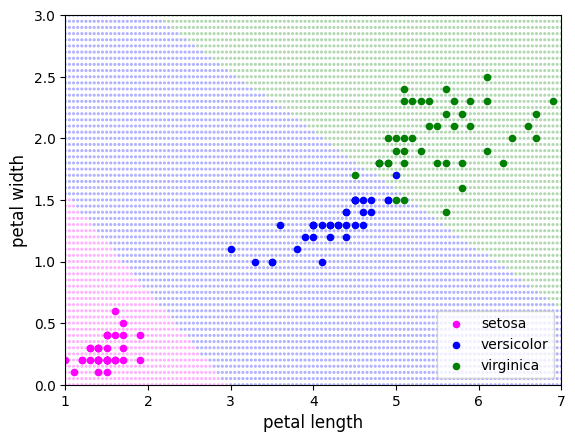

In [ ]:
visualize(bp_model_tf, X_tr, y_tr,
           multi_class=True,
           class_id=labels,
           labels=[0, 1, 2],
           colors=['magenta', 'blue', 'green'],
           xlabel='petal length',
           ylabel='petal width')